In [1]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
real_dir = "D:/Pythonfile/Audio-Deepfake-Detection/data/processed/eval/bonafide"
fake_dir = "D:/Pythonfile/Audio-Deepfake-Detection/data/processed/eval/spoof"

def get_durations(folder, label):
    durations = []
    for f in os.listdir(folder):
        if f.endswith(".wav") or f.endswith(".flac"):
            path = os.path.join(folder, f)
            y, sr = librosa.load(path, sr=16000)
            durations.append(len(y) / sr)
    return pd.DataFrame({
        "duration": durations,
        "label": label
    })

df_real = get_durations(real_dir, "REAL")
df_fake = get_durations(fake_dir, "FAKE")

df = pd.concat([df_real, df_fake], ignore_index=True)


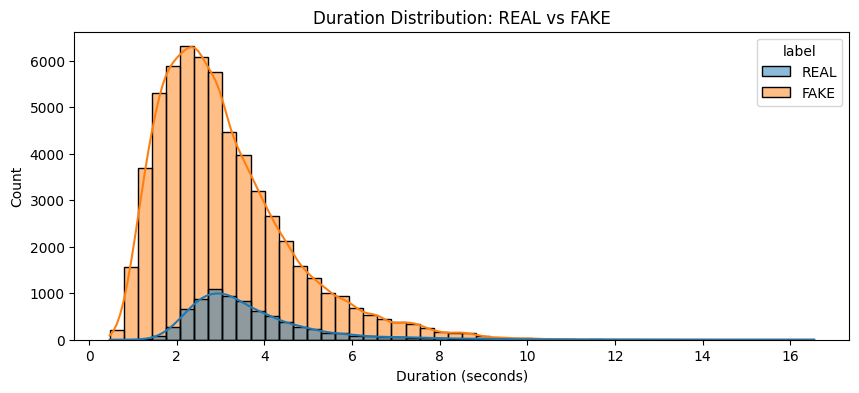

In [ ]:
total_duration = df.groupby("label")["duration"].sum().reset_index()
print(total_duration)
plt.figure(figsize=(6,4))
sns.barplot(
    data=total_duration,
    x="label",
    y="duration",
    palette={"REAL": "green", "FAKE": "red"}
)

plt.ylabel("Total Duration (seconds)")
plt.xlabel("Label")
plt.title("Total Audio Duration per Label")

# Hiển thị số lên đầu cột
for i, row in total_duration.iterrows():
    plt.text(i, row["duration"], f'{row["duration"]:.1f}', 
             ha='center', va='bottom')

plt.show()
